In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('placement.csv')
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [3]:
df = df.iloc[: , 1:]
df

cgpa     iq  placement
0    6.8  123.0          1
1    5.9  106.0          0
2    5.3  121.0          0
3    7.4  132.0          1
4    5.8  142.0          0
..   ...    ...        ...
95   4.3  200.0          0
96   4.4   42.0          0
97   6.7  182.0          1
98   6.3  103.0          1
99   6.2  113.0          1

[100 rows x 3 columns]

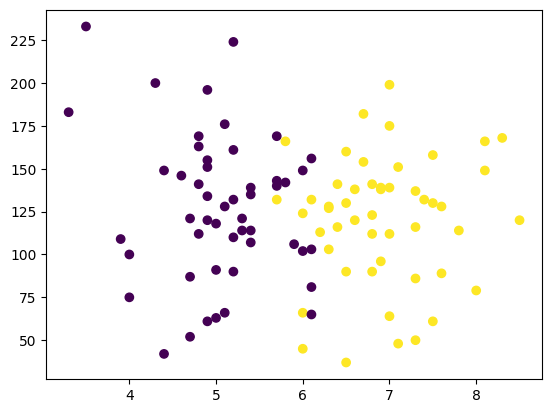

In [4]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [5]:
x = df.iloc[:,0:2]
y=df.iloc[:,-1]

In [6]:
x.head()



cgpa     iq
0   6.8  123.0
1   5.9  106.0
2   5.3  121.0
3   7.4  132.0
4   5.8  142.0

In [7]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [9]:
x_train


cgpa     iq
62   6.0  102.0
46   5.3  114.0
93   6.8  112.0
60   6.9  139.0
89   4.9  151.0
..   ...    ...
12   5.4  139.0
77   7.3   50.0
6    5.7  143.0
99   6.2  113.0
74   6.7  154.0

[90 rows x 2 columns]

In [10]:
y_train

62    0
46    0
93    1
60    1
89    0
     ..
12    0
77    1
6     0
99    1
74    1
Name: placement, Length: 90, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
x_train =scaler.fit_transform(x_train)
x_train

array([[ 0.00403821, -0.48903672],
       [-0.63198029, -0.19397546],
       [ 0.7309165 , -0.24315234],
       [ 0.82177628,  0.4207355 ],
       [-0.99541943,  0.71579677],
       [-1.8131575 , -0.5382136 ],
       [ 1.91209371,  1.08462335],
       [ 0.45833714, -2.08728523],
       [-0.90455964, -0.75950955],
       [-1.8131575 , -1.15292456],
       [ 1.18521542, -0.14479858],
       [ 0.64005671,  1.47803836],
       [-0.17768136,  0.49450082],
       [ 1.36693499,  0.88791584],
       [-0.99541943,  1.8222765 ],
       [ 0.27661757, -0.46444828],
       [ 0.7309165 ,  0.46991238],
       [ 0.91263607,  1.89604182],
       [-0.99541943,  0.81415052],
       [-0.72284007,  0.96168115],
       [-0.90455964, -1.44798583],
       [ 0.54919693, -0.04644483],
       [ 0.36747735,  0.46991238],
       [ 1.45779478, -0.80868642],
       [-0.72284007,  2.51075278],
       [-1.08627921, -0.24315234],
       [ 0.094898  ,  0.83873896],
       [-2.26745642,  2.73204873],
       [ 0.82177628,

In [14]:
x_test = scaler.transform(x_test)
x_test

array([[-0.26854114,  1.15838866],
       [ 0.91263607, -0.24315234],
       [ 0.7309165 ,  0.02732049],
       [ 2.09381328,  1.13380022],
       [ 0.27661757,  0.12567424],
       [-2.44917599,  1.5026268 ],
       [ 1.00349585,  0.71579677],
       [-1.90401728, -0.31691765],
       [-0.5411205 , -0.19397546],
       [-0.26854114,  0.24861643]])

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression()

In [17]:
clf.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
y_test

84    0
29    1
0     1
53    1
70    1
17    0
21    1
31    0
41    0
87    1
Name: placement, dtype: int64

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.9

In [22]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

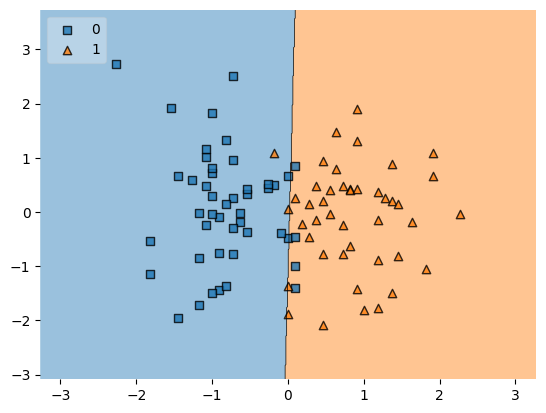

In [23]:
plot_decision_regions(x_train, y_train.values, clf=clf , legend=2)


In [24]:
import pickle

In [26]:
pickle.dump(clf,open('model.pkl','wb'))